In [1]:
import numpy as np
import pandas as pd

In [2]:
batting3_df = pd.read_csv("db/batting3.csv")

Summarize the batting data into player data

In [3]:
batting3_df = batting3_df.groupby(["playerID"],as_index=False).sum()
batting3_df.head(10)

,playerID,yearID,latest yr,seasonnum,G,AB,R,H,2B,3B,...,AVG,SLG,Pts_AVG,Pts_H,Pts_RBI,Pts_R,Pts_HR,Pts_2B,Pts_SB,Pts_SLG
0,aaronha01,19585,19630,55,1511,5940,1077,1898,321,77,...,3.184283,5.690842,22.5,10,21,27,27.5,4,0,14
1,abreubo01,20015,20060,55,1470,5254,950,1590,374,44,...,2.744196,4.611408,12.5,0,15,18,5.0,11,1,2
2,adamssp01,19276,19330,55,1295,5108,779,1472,230,45,...,2.028772,2.511279,5.0,0,0,3,0.0,4,0,0
3,adcocjo01,19545,19590,55,1128,3910,513,1106,198,26,...,0.883495,1.569459,2.5,0,3,0,2.5,0,0,2
4,ageeto01,15756,15784,36,1088,3840,553,987,168,27,...,1.064814,1.749522,0.0,0,0,3,0.0,0,1,0
5,alfoned01,19995,20040,55,1367,4930,736,1419,263,17,...,2.319442,3.563004,10.0,0,3,6,0.0,2,0,0
6,allendi01,19685,19730,55,1353,4961,884,1484,254,73,...,2.676504,4.972878,12.5,5,9,6,15.0,1,0,12
7,alleyge01,19685,19730,55,1178,3876,439,988,139,44,...,1.082789,1.477546,0.0,0,0,0,0.0,0,0,0
8,allisbo01,19635,19680,55,1402,4736,777,1216,202,51,...,2.319609,4.313173,0.0,0,6,3,7.5,0,0,2
9,alomaro01,19925,19970,55,1416,5460,893,1659,296,54,...,2.407220,3.469854,7.5,0,0,9,0.0,3,4,0


In [4]:
# no longer needed, and their sums would not make sense any way
del batting3_df["yearID"]
del batting3_df["latest yr"]
del batting3_df["seasonnum"]

In [5]:
# computed fields must be re-computed - their sums wouldn't make any sense
batting3_df["AVG"]  =  batting3_df["H"]/batting3_df["AB"]
batting3_df["SLG"]  = (batting3_df["H"]+batting3_df["2B"]+2*batting3_df["3B"]+3*batting3_df["HR"])/batting3_df["AB"]

In [6]:
batting3_df.head(10)

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,AVG,SLG,Pts_AVG,Pts_H,Pts_RBI,Pts_R,Pts_HR,Pts_2B,Pts_SB,Pts_SLG
0,aaronha01,1511,5940,1077,1898,321,77,342,1121,103,...,0.319529,0.572222,22.5,10,21,27,27.5,4,0,14
1,abreubo01,1470,5254,950,1590,374,44,205,882,271,...,0.302627,0.507613,12.5,0,15,18,5.0,11,1,2
2,adamssp01,1295,5108,779,1472,230,45,9,364,151,...,0.288175,0.356108,5.0,0,0,3,0.0,4,0,0
3,adcocjo01,1128,3910,513,1106,198,26,181,637,9,...,0.282864,0.485678,2.5,0,3,0,2.5,0,0,2
4,ageeto01,1088,3840,553,987,168,27,129,425,167,...,0.257031,0.415625,0.0,0,0,3,0.0,0,1,0
5,alfoned01,1367,4930,736,1419,263,17,144,696,51,...,0.287830,0.435700,10.0,0,3,6,0.0,2,0,0
6,allendi01,1353,4961,884,1484,254,73,287,887,103,...,0.299133,0.553316,12.5,5,9,6,15.0,1,0,12
7,alleyge01,1178,3876,439,988,139,44,55,342,63,...,0.254902,0.356037,0.0,0,0,0,0.0,0,0,0
8,allisbo01,1402,4736,777,1216,202,51,247,762,81,...,0.256757,0.477407,0.0,0,6,3,7.5,0,0,2
9,alomaro01,1416,5460,893,1659,296,54,113,653,322,...,0.303846,0.439927,7.5,0,0,9,0.0,3,4,0


At this point, introduce data to identify players as being in the Hall Of Fame or not

In [7]:
HOF_df = pd.read_csv("db/HallOfFame.csv")
HOF_df.head()


,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [8]:
# unsuccessful votes are irrelevant for our purposes
HOF_subset1_df = HOF_df.loc[HOF_df["inducted"] == "Y", :]

# consider only those elected as players.  Some players were elected as managers.
HOF_subset2_df = HOF_subset1_df.loc[HOF_subset1_df["category"] == "Player", :]

# exclude any players elected from the Negro Leagues.  These are not likely to have relevant MLB statistics
HOF_subset3_df = HOF_subset2_df.loc[HOF_subset2_df["votedBy"] != "Negro League", :]


# discard unneeded columns
xyz = ["playerID","inducted"]
HOF_df = HOF_subset3_df[xyz]
HOF_df.head()


,playerID,inducted
0,cobbty01,Y
1,ruthba01,Y
2,wagneho01,Y
3,mathech01,Y
4,johnswa01,Y


In [9]:
batting3_df = pd.merge(batting3_df, HOF_df, on="playerID", how="left")


In [10]:
batting3_df.head(30)

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,SLG,Pts_AVG,Pts_H,Pts_RBI,Pts_R,Pts_HR,Pts_2B,Pts_SB,Pts_SLG,inducted
0,aaronha01,1511,5940,1077,1898,321,77,342,1121,103,...,0.572222,22.5,10,21,27,27.5,4,0,14,Y
1,abreubo01,1470,5254,950,1590,374,44,205,882,271,...,0.507613,12.5,0,15,18,5.0,11,1,2,NaN
2,adamssp01,1295,5108,779,1472,230,45,9,364,151,...,0.356108,5.0,0,0,3,0.0,4,0,0,NaN
3,adcocjo01,1128,3910,513,1106,198,26,181,637,9,...,0.485678,2.5,0,3,0,2.5,0,0,2,NaN
4,ageeto01,1088,3840,553,987,168,27,129,425,167,...,0.415625,0.0,0,0,3,0.0,0,1,0,NaN
5,alfoned01,1367,4930,736,1419,263,17,144,696,51,...,0.435700,10.0,0,3,6,0.0,2,0,0,NaN
6,allendi01,1353,4961,884,1484,254,73,287,887,103,...,0.553316,12.5,5,9,6,15.0,1,0,12,NaN
7,alleyge01,1178,3876,439,988,139,44,55,342,63,...,0.356037,0.0,0,0,0,0.0,0,0,0,NaN
8,allisbo01,1402,4736,777,1216,202,51,247,762,81,...,0.477407,0.0,0,6,3,7.5,0,0,2,NaN
9,alomaro01,1416,5460,893,1659,296,54,113,653,322,...,0.439927,7.5,0,0,9,0.0,3,4,0,Y


We will need to convert the "inducted" to 1s and 0s

In [11]:
HOF_member = []
for index, player in batting3_df.iterrows():
    if player["inducted"] == "Y":
        HOF_member.append(1)
    else:
        HOF_member.append(0)

batting3_df["HOF_member"] = HOF_member
batting3_df.head(10)

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,Pts_AVG,Pts_H,Pts_RBI,Pts_R,Pts_HR,Pts_2B,Pts_SB,Pts_SLG,inducted,HOF_member
0,aaronha01,1511,5940,1077,1898,321,77,342,1121,103,...,22.5,10,21,27,27.5,4,0,14,Y,1
1,abreubo01,1470,5254,950,1590,374,44,205,882,271,...,12.5,0,15,18,5.0,11,1,2,NaN,0
2,adamssp01,1295,5108,779,1472,230,45,9,364,151,...,5.0,0,0,3,0.0,4,0,0,NaN,0
3,adcocjo01,1128,3910,513,1106,198,26,181,637,9,...,2.5,0,3,0,2.5,0,0,2,NaN,0
4,ageeto01,1088,3840,553,987,168,27,129,425,167,...,0.0,0,0,3,0.0,0,1,0,NaN,0
5,alfoned01,1367,4930,736,1419,263,17,144,696,51,...,10.0,0,3,6,0.0,2,0,0,NaN,0
6,allendi01,1353,4961,884,1484,254,73,287,887,103,...,12.5,5,9,6,15.0,1,0,12,NaN,0
7,alleyge01,1178,3876,439,988,139,44,55,342,63,...,0.0,0,0,0,0.0,0,0,0,NaN,0
8,allisbo01,1402,4736,777,1216,202,51,247,762,81,...,0.0,0,6,3,7.5,0,0,2,NaN,0
9,alomaro01,1416,5460,893,1659,296,54,113,653,322,...,7.5,0,0,9,0.0,3,4,0,Y,1


In [12]:
batting3_df.columns

Index(['playerID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB',
       'HBP', 'SH', 'SF', 'lastyear', 'Games_C', 'Games_2B', 'Games_3B',
       'Games_SS', 'PA', 'AVG', 'SLG', 'Pts_AVG', 'Pts_H', 'Pts_RBI', 'Pts_R',
       'Pts_HR', 'Pts_2B', 'Pts_SB', 'Pts_SLG', 'inducted', 'HOF_member'],
      dtype='object')

Columns with high correlation should not both be used.

In [13]:
pd.options.display.float_format = '{:,.2f}'.format

In [14]:
# create a work dataframe that will make seeing correlations a little easier
work_df = batting3_df[["R", "H", "2B", "HR", "RBI", "SB", "AVG", "SLG",
                  "Pts_R", "Pts_H", "Pts_2B", "Pts_HR", "Pts_RBI", "Pts_SB", "Pts_AVG", "Pts_SLG"]]

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


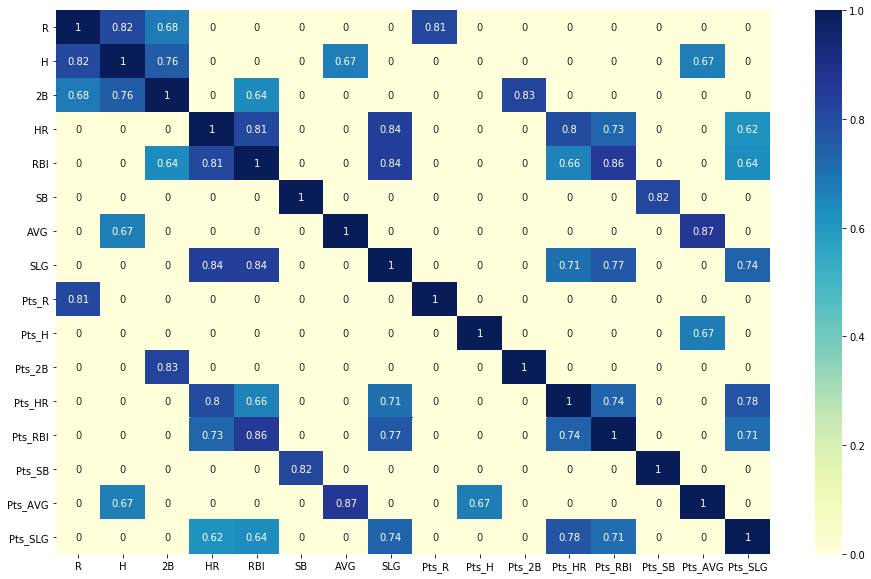

In [16]:
corr_matrix = work_df.corr()
corr_matrix[np.abs(corr_matrix) < .6] = 0      # masking lower correlations helps higher ones to stand out

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

The most obvious thing we see here is that nearly all representations of seasonal accomplishments (pts_x) have a high correlation with their corresponding career fields.  So they can be discarded.

We see that Stolen Bases has no strong correlations with any other stat here, and Batting Average only with Hits so we will keep both of these.  So then we should discard Hits even if 3000 lifetime hits is a well-known career target achievement.

Next, remembering that doubles and home runs are components of slugging percent, my instinct tells me that we lose the least by dropping those two.

That leaves us with five stats:  Runs Scored, Runs Batted In, Stolen Bases, Batting Average, and Slugging Percent.  Between these five, there is a high correlation between just two:  RBI and Slugging Pct.  I'll tolerate that for now, and revisit it later if necessary.

-----
With that, we can cut down again on the number of columns we need to keep.  With a change this big, we'll move to the next generation (batting4),


In [17]:
xyz = ["playerID","R","RBI","SB","AVG","SLG","Games_C","Games_2B","Games_3B","Games_SS","HOF_member"]
batting4_df = batting3_df[xyz]
batting4_df.head()

,playerID,R,RBI,SB,AVG,SLG,Games_C,Games_2B,Games_3B,Games_SS,HOF_member
0,aaronha01,1077,1121,103,0.32,0.57,0.00,29.00,7.00,0.00,1
1,abreubo01,950,882,271,0.30,0.51,0.00,0.00,0.00,0.00,0
2,adamssp01,779,364,151,0.29,0.36,0.00,511.00,464.00,297.00,0
3,adcocjo01,513,637,9,0.28,0.49,0.00,0.00,0.00,0.00,0
4,ageeto01,553,425,167,0.26,0.42,0.00,0.00,0.00,0.00,0


"lastyear" was polluted by being summed, but we still need it for one more thing.  Merge it back in from when it was last good, that being in batting2.

In [18]:
batting2_df = pd.read_csv("db/batting2.csv")
batting2_df = batting2_df[["playerID","lastyear"]]
batting2_df.drop_duplicates(inplace=True)
batting2_df.head(10)

,playerID,lastyear
0,aaronha01,1976
23,abreubo01,2014
41,adamssp01,1934
54,adcocjo01,1966
71,ageeto01,1973
83,alfoned01,2006
95,allendi01,1977
110,alleyge01,1973
121,allisbo01,1970
134,alomaro01,2004


In [19]:
batting4_df = pd.merge(batting4_df, batting2_df, on="playerID", how="left")
batting4_df.head(20)

,playerID,R,RBI,SB,AVG,SLG,Games_C,Games_2B,Games_3B,Games_SS,HOF_member,lastyear
0,aaronha01,1077,1121,103,0.32,0.57,0.00,29.00,7.00,0.00,1,1976
1,abreubo01,950,882,271,0.30,0.51,0.00,0.00,0.00,0.00,0,2014
2,adamssp01,779,364,151,0.29,0.36,0.00,511.00,464.00,297.00,0,1934
3,adcocjo01,513,637,9,0.28,0.49,0.00,0.00,0.00,0.00,0,1966
4,ageeto01,553,425,167,0.26,0.42,0.00,0.00,0.00,0.00,0,1973
5,alfoned01,736,696,51,0.29,0.44,0.00,535.00,777.00,34.00,0,2006
6,allendi01,884,887,103,0.30,0.55,0.00,3.00,651.00,3.00,0,1977
7,alleyge01,439,342,63,0.25,0.36,0.00,126.00,24.00,973.00,0,1973
8,allisbo01,777,762,81,0.26,0.48,0.00,0.00,0.00,0.00,0,1970
9,alomaro01,893,653,322,0.30,0.44,0.00,"1,381.00",0.00,5.00,1,2004


------
Next will be to split off more recent players.  These are still active and recent retirees, and can be used to make and test predictions.

In [20]:
batting_recent_df = batting4_df.loc[batting4_df["lastyear"] > 2010, :]
batting4_df       = batting4_df.loc[batting4_df["lastyear"] < 2011, :]

At this point, the data is ready to be processed into a logistic regression.  Drop playerID and lastyear.  Write out files without headers.

In [21]:
del batting_recent_df["lastyear"]
batting_recent_df.head()

,playerID,R,RBI,SB,AVG,SLG,Games_C,Games_2B,Games_3B,Games_SS,HOF_member
1,abreubo01,950,882,271,0.30,0.51,0.00,0.00,0.00,0.00,0
15,andruel01,801,557,271,0.28,0.37,0.00,0.00,0.00,"1,453.00",0
22,aybarer01,601,449,143,0.27,0.37,0.00,52.00,13.00,"1,219.00",0
38,bautijo02,699,678,49,0.26,0.49,0.00,5.00,378.00,0.00,0
39,bayja01,722,740,92,0.27,0.48,0.00,0.00,0.00,0.00,0


In [22]:
del batting4_df["lastyear"]
batting4_df.head()

,playerID,R,RBI,SB,AVG,SLG,Games_C,Games_2B,Games_3B,Games_SS,HOF_member
0,aaronha01,1077,1121,103,0.32,0.57,0.00,29.00,7.00,0.00,1
2,adamssp01,779,364,151,0.29,0.36,0.00,511.00,464.00,297.00,0
3,adcocjo01,513,637,9,0.28,0.49,0.00,0.00,0.00,0.00,0
4,ageeto01,553,425,167,0.26,0.42,0.00,0.00,0.00,0.00,0
5,alfoned01,736,696,51,0.29,0.44,0.00,535.00,777.00,34.00,0


In [23]:
batting_recent_df.to_csv("db/batting_recent.csv", index=False, header=True)

In [24]:
batting4_df.to_csv("db/batting4.csv", index=False, header=True)